In [1]:
import pandas as pd 

In [2]:
import numpy as np  

In [3]:
import matplotlib.pyplot as plt 

In [4]:
df=pd.read_csv("delivery_time (1).csv")
df 

,DeliveryTime,SortingTime
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [5]:
pd.set_option('display.min_rows',None) 

In [6]:
df.shape

(21, 2)

In [7]:
df

,DeliveryTime,SortingTime
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [8]:
df.describe()

,DeliveryTime,SortingTime
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [9]:
# EDA and Data Visualization

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DeliveryTime  21 non-null     float64
 1   SortingTime   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [11]:
df.columns

Index(['DeliveryTime', 'SortingTime'], dtype='object')

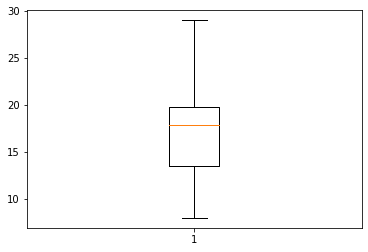

In [12]:
plt.boxplot(df.DeliveryTime)
plt.show()


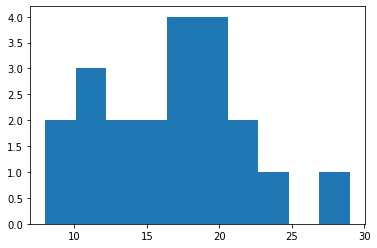

In [13]:
plt.hist(df.DeliveryTime)
plt.show()

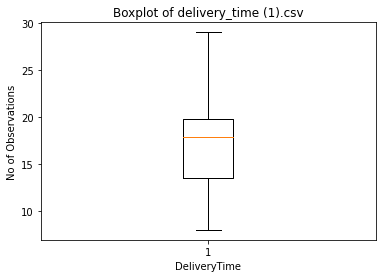

In [14]:
plt.boxplot(df.DeliveryTime)
plt.xlabel("DeliveryTime") 
plt.ylabel("No of Observations")
plt.title("Boxplot of delivery_time (1).csv")
plt.show()

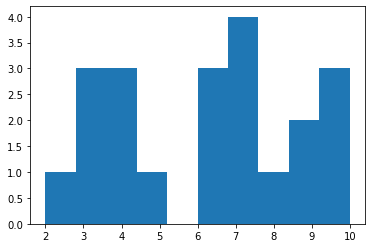

In [15]:
plt.hist(df.SortingTime)
plt.show()

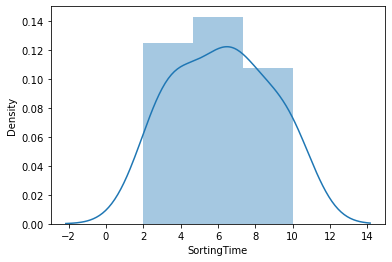

In [16]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
sns.distplot(df['SortingTime'])
plt.show()

<AxesSubplot:xlabel='SortingTime', ylabel='Density'>

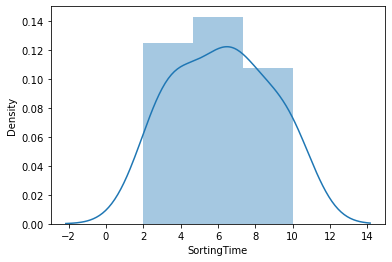

In [17]:
sns.distplot(df['SortingTime'])

Text(0.5, 1.0, 'ScatterPlot')

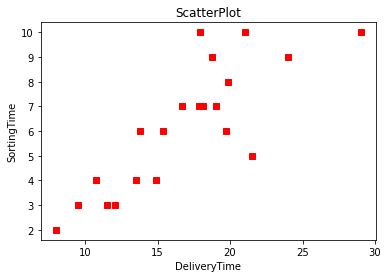

In [18]:
import matplotlib.pyplot as plt 
plt.plot(df.DeliveryTime,df.SortingTime,"rs")
plt.xlabel('DeliveryTime')
plt.ylabel("SortingTime")
plt.title("ScatterPlot")

In [19]:
#correlation

In [20]:
df.corr()

,DeliveryTime,SortingTime
DeliveryTime,1.000000,0.825997
SortingTime,0.825997,1.000000


In [21]:
#building model

In [22]:
import statsmodels.formula.api as smf
model=smf.ols("SortingTime~DeliveryTime",data=df).fit()

In [23]:
model.params

Intercept      -0.756673
DeliveryTime    0.413744
dtype: float64

In [24]:
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            SortingTime   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Thu, 10 Nov 2022   Prob (F-statistic):           3.98e-06
Time:                        08:58:55   Log-Likelihood:                -36.839
No. Observations:                  21   AIC:                             77.68
Df Residuals:                      19   BIC:                             79.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.7567      1.134     -0.667      0.513      -3.130       1.617
DeliveryTime     0.4137      0.065      6.387      0.000       0.278       0.549
==============================================================================
Omnibus:                        1.409   Durbin-Watson:                   1.346
Prob(Omnibus):                  0.494   Jarque-Bera (JB):                0.371
Skew:                           0.255   Prob(JB):                        0.831
Kurtosis:                       3.405   Cond. No.                         62.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
model.resid 

0     2.068057
1    -0.828866
2    -1.414763
3    -0.173174
4    -1.241892
5     0.405709
6    -0.104456
7    -0.173891
8     3.350662
9     1.998980
10    0.552137
11    0.308929
12    0.855430
13   -1.001378
14   -1.220662
15   -1.399832
16    1.067698
17    0.263776
18   -0.553276
19    0.379624
20   -3.138815
dtype: float64

In [26]:
model.resid_pearson 

array([ 1.40674689, -0.56381619, -0.9623592 , -0.11779731, -0.8447675 ,
        0.27597371, -0.07105342, -0.1182853 ,  2.27920872,  1.35975901,
        0.37557826,  0.21014188,  0.58188575, -0.6811639 , -0.83032673,
       -0.95220243,  0.72627659,  0.17942755, -0.37635266,  0.25823056,
       -2.13510428])

In [27]:
pred=model.predict(df.DeliveryTime)
#pred=model.predict(df.iloc[:,0])
pred 

0      7.931943
1      4.828866
2      7.414763
3      9.173174
4     11.241892
5      5.594291
6      7.104456
7      3.173891
8      6.649338
9      7.001020
10     7.447863
11     3.691071
12     6.144570
13     4.001378
14     4.220662
15     5.399832
16     4.932302
17     6.736224
18     2.553276
19     6.620376
20     8.138815
dtype: float64

In [28]:
rmse_lin=np.sqrt(np.mean((np.array(df['DeliveryTime'])-np.array(pred))**2)) 

Text(0, 0.5, 'Start Menu/')

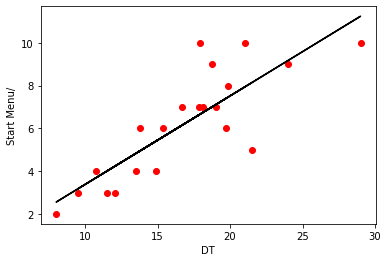

In [29]:
import matplotlib.pyplot as plt 
plt.scatter(x=df['DeliveryTime'],y=df['SortingTime'],color='red')
plt.plot(df['DeliveryTime'],pred,color='black')
plt.xlabel('DT')
plt.ylabel('Start Menu/')
          

In [30]:
model2=smf.ols('SortingTime~np.log(DeliveryTime)',data=df).fit() 


In [31]:
model2.params 

Intercept              -12.499233
np.log(DeliveryTime)     6.735548
dtype: float64

In [32]:
model2.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            SortingTime   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     46.73
Date:                Thu, 10 Nov 2022   Prob (F-statistic):           1.59e-06
Time:                        08:58:56   Log-Likelihood:                -35.846
No. Observations:                  21   AIC:                             75.69
Df Residuals:                      19   BIC:                             77.78
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              -12.4992      2.751     -4.543      0.000     -18.257      -6.741
np.log(DeliveryTime)     6.7355      0.985      6.836      0.000       4.673       8.798
==============================================================================
Omnibus:                        1.323   Durbin-Watson:                   1.202
Prob(Omnibus):                  0.516   Jarque-Bera (JB):                0.242
Skew:                          -0.025   Prob(JB):                        0.886
Kurtosis:                       3.523   Cond. No.                         28.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
model2.resid 

0     1.992704
1    -1.031310
2    -1.593942
3     0.093297
4    -0.181351
5     0.103672
6    -0.333179
7     0.335548
8     3.068518
9     1.756035
10    0.378830
11    0.502940
12    0.543982
13   -0.951314
14   -1.254794
15   -1.686869
16    0.845099
17   -0.010043
18    0.493053
19    0.094910
20   -3.165786
dtype: float64

In [34]:
model2.resid_pearson 

array([ 1.42113829, -0.73549981, -1.13675271,  0.06653685, -0.1293345 ,
        0.07393595, -0.23761321,  0.23930282,  2.18837683,  1.25235279,
        0.27017028,  0.35868204,  0.38795221, -0.67844924, -0.89488241,
       -1.2030258 ,  0.60269965, -0.00716213,  0.35163128,  0.06768673,
       -2.25774594])

In [35]:
pred2=model2.predict(df.DeliveryTime)

In [36]:
pred2


0      8.007296
1      5.031310
2      7.593942
3      8.906703
4     10.181351
5      5.896328
6      7.333179
7      2.664452
8      6.931482
9      7.243965
10     7.621170
11     3.497060
12     6.456018
13     3.951314
14     4.254794
15     5.686869
16     5.154901
17     7.010043
18     1.506947
19     6.905090
20     8.165786
dtype: float64

In [37]:
rmse_log=np.sqrt(np.mean((np.array(df['SortingTime'])-np.array(pred2))**2))
rmse_log 

1.3337477286899515

In [38]:
pred.corr(df.SortingTime) 

0.8259972607955326

Text(0, 0.5, 'ST')

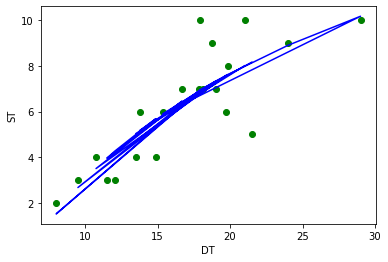

In [39]:
plt.scatter(x=df['DeliveryTime'],y=df['SortingTime'],color='green') 
plt.plot(df['DeliveryTime'],pred2,color='blue')
plt.xlabel('DT')
plt.ylabel('ST') 


In [40]:
model3=smf.ols('np.log(SortingTime)~DeliveryTime',data=df).fit() 

In [41]:
model3.params 

Intercept       0.437237
DeliveryTime    0.076901
dtype: float64

In [42]:
model3.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     np.log(SortingTime)   R-squared:                       0.695
Model:                             OLS   Adj. R-squared:                  0.679
Method:                  Least Squares   F-statistic:                     43.39
Date:                 Thu, 10 Nov 2022   Prob (F-statistic):           2.64e-06
Time:                         08:58:56   Log-Likelihood:               -0.85600
No. Observations:                   21   AIC:                             5.712
Df Residuals:                       19   BIC:                             7.801
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.4372      0.204      2.139      0.046       0.009       0.865
DeliveryTime     0.0769      0.012      6.587      0.000       0.052       0.101
==============================================================================
Omnibus:                        0.744   Durbin-Watson:                   1.691
Prob(Omnibus):                  0.689   Jarque-Bera (JB):                0.686
Skew:                          -0.101   Prob(JB):                        0.710
Kurtosis:                       2.138   Cond. No.                         62.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
model3.resid 

0     0.250437
1    -0.089100
2    -0.164263
3    -0.085625
4    -0.364767
5     0.174099
6     0.047563
7    -0.069179
8     0.488829
9     0.318103
10    0.117267
11    0.122377
12    0.225972
13   -0.222981
14   -0.263738
15   -0.195222
16    0.297140
17    0.116005
18   -0.359294
19    0.137537
20   -0.481160
dtype: float64

In [44]:
model3.resid_pearson 

array([ 0.94514898, -0.33626175, -0.61992804, -0.32314918, -1.3766316 ,
        0.65705128,  0.17950335, -0.26108323,  1.84483896,  1.20051932,
        0.44256592,  0.46185032,  0.85281972, -0.84152838, -0.99534634,
       -0.7367689 ,  1.12140739,  0.43780144, -1.35597416,  0.51906376,
       -1.81589886])

In [45]:
pred_log=model3.predict(pd.DataFrame(df['DeliveryTime'])) 

In [46]:
pred_log 

0     2.052148
1     1.475394
2     1.956022
3     2.282850
4     2.667352
5     1.617660
6     1.898347
7     1.167792
8     1.813756
9     1.879122
10    1.962174
11    1.263917
12    1.719938
13    1.321593
14    1.362350
15    1.581517
16    1.494619
17    1.829905
18    1.052441
19    1.808373
20    2.090598
dtype: float64

In [47]:
model3.resid_pearson

array([ 0.94514898, -0.33626175, -0.61992804, -0.32314918, -1.3766316 ,
        0.65705128,  0.17950335, -0.26108323,  1.84483896,  1.20051932,
        0.44256592,  0.46185032,  0.85281972, -0.84152838, -0.99534634,
       -0.7367689 ,  1.12140739,  0.43780144, -1.35597416,  0.51906376,
       -1.81589886])

In [48]:
pred3=np.exp(pred_log) 

In [49]:
pred3 


0      7.784605
1      4.372758
2      7.071145
3      9.804581
4     14.401789
5      5.041280
6      6.674852
7      3.214886
8      6.133444
9      6.547752
10     7.114781
11     3.539259
12     5.584181
13     3.749389
14     3.905361
15     4.862325
16     4.457638
17     6.233298
18     2.864635
19     6.100516
20     8.089754
dtype: float64

In [50]:
rmse_exp=np.sqrt(np.mean((np.array(df['SortingTime'])-np.array(pred3))**2))  

rmse_exp 

1.7921450016869793

In [51]:
pred3.corr(df.SortingTime)  

0.7472768828616799

Text(0, 0.5, 'ST')

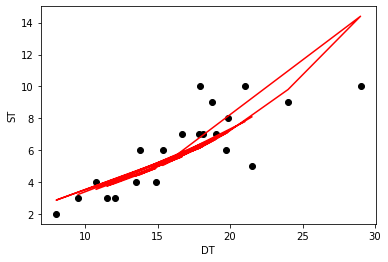

In [52]:
plt.scatter(x=df['DeliveryTime'],y=df['SortingTime'],color='black') 
plt.plot(df.DeliveryTime,pred3,color='red')
plt.xlabel('DT')
plt.ylabel('ST') 

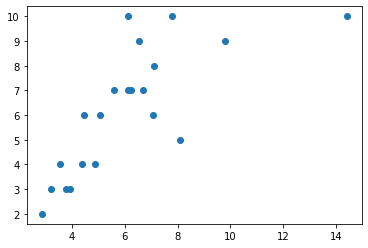

In [53]:
plt.scatter(x=pred3,y=df.SortingTime) 

Text(0, 0.5, 'Actual')

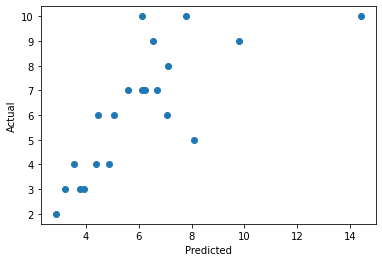

In [54]:
plt.scatter(x=pred3,y=df.SortingTime) 
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [55]:
df["DeliveryTime_Sq"]=df.DeliveryTime*df.DeliveryTime  
df 

,DeliveryTime,SortingTime,DeliveryTime_Sq
0,21.00,10,441.0000
1,13.50,4,182.2500
2,19.75,6,390.0625
3,24.00,9,576.0000
4,29.00,10,841.0000
5,15.35,6,235.6225
6,19.00,7,361.0000
7,9.50,3,90.2500
8,17.90,10,320.4100
9,18.75,9,351.5625


In [56]:
model_quad=smf.ols("np.log(SortingTime)~DeliveryTime+DeliveryTime-Sq",data=df).fit()

In [57]:
model_quad.params 

Intercept       0.437237
DeliveryTime    0.076901
dtype: float64

In [58]:
model_quad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     np.log(SortingTime)   R-squared:                       0.695
Model:                             OLS   Adj. R-squared:                  0.679
Method:                  Least Squares   F-statistic:                     43.39
Date:                 Thu, 10 Nov 2022   Prob (F-statistic):           2.64e-06
Time:                         08:58:57   Log-Likelihood:               -0.85600
No. Observations:                   21   AIC:                             5.712
Df Residuals:                       19   BIC:                             7.801
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.4372      0.204      2.139      0.046       0.009       0.865
DeliveryTime     0.0769      0.012      6.587      0.000       0.052       0.101
==============================================================================
Omnibus:                        0.744   Durbin-Watson:                   1.691
Prob(Omnibus):                  0.689   Jarque-Bera (JB):                0.686
Skew:                          -0.101   Prob(JB):                        0.710
Kurtosis:                       2.138   Cond. No.                         62.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
pred_quad=model_quad.predict(df) 
pred4=np.exp(pred_quad) 
pred4 

0      7.784605
1      4.372758
2      7.071145
3      9.804581
4     14.401789
5      5.041280
6      6.674852
7      3.214886
8      6.133444
9      6.547752
10     7.114781
11     3.539259
12     5.584181
13     3.749389
14     3.905361
15     4.862325
16     4.457638
17     6.233298
18     2.864635
19     6.100516
20     8.089754
dtype: float64